<div style="text-align: center;"/>
<img src="images/structured-data-vs-unstructured-data.png" width=800 />
</div>

<div style="text-align: center;"/>
<img src="images/1-s2.0-S1532046421000253-ga1_lrg.jpg" width=800 />
</div>

<div style="text-align: center;"/>
<img src="images/buildings-12-00037-g001.webp" width=800 />
</div>

In [45]:
pacman::p_load(bibliometrix, tidyverse)

fig <- function(width, heigth) {
    options(repr.plot.width = width, repr.plot.height = heigth)
}

In [46]:
fin <- "./data/pubmed-cbtORcogni-set.txt"
df_0 <- convert2df(fin, dbsource = "pubmed", format = "pubmed")


Converting your pubmed collection into a bibliographic dataframe

Done!


Generating affiliation field tag AU_UN from C1:  Done!



In [47]:
df_0 |>
  as_tibble() |>
  names()

[1] "AU"       "AF"       "DE"       "AID"      "OT"       "PHST"     "DT"       "AB"       "C1"       "OI"      
[11] "BTI"      "CI"       "CIN"      "CN"       "COIS"     "CON"      "CRDT"     "CTDT"     "CTI"      "DCOM"    
[21] "DEP"      "PY"       "DRDT"     "ECI"      "ED"       "EDAT"     "EIN"      "FED"      "FIR"      "GR"      
[31] "IS"       "IR"       "SN"       "ISBN"     "JID"      "SO"       "LA"       "LID"      "LR"       "MHDA"    
[41] "MID"      "OAB"      "OABL"     "OID"      "OTO"      "OWN"      "PB"       "PP"       "PL"       "PMC"     
[51] "PMCR"     "PMID"     "PST"      "RIN"      "RN"       "SB"       "SI"       "SO2"      "STAT"     "J9"      
[61] "TI"       "TT"       "UIN"      "UOF"      "VL"       "DI"       "DB"       "ID"       "RP"       "TC"      
[71] "CR"       "AU_UN"    "AU1_UN"   "AU_UN_NR" "SR_FULL"  "SR"

## Bibliometric analysis

In [9]:
results <- biblioAnalysis(df_0, sep = ";")
summ <- summary(object = results, k = 10, pause = FALSE)
summ



MAIN INFORMATION ABOUT DATA

 Timespan                              1993 : 2023 
 Sources (Journals, Books, etc)        742 
 Documents                             2615 
 Annual Growth Rate %                  29.72 
 Document Average Age                  4.81 
 Average citations per doc             0 
 Average citations per year per doc    0 
 References                            1 
 
DOCUMENT TYPES                     
 address;journal article                                               1 
 case reports                                               21 
 case reports;clinical conference;journal article                                               1 
 case reports;comparative study;journal article;randomized controlled trial                                               1 
 case reports;journal article                                               41 
 case reports;journal article;randomized controlled trial                                               2 
 case reports;journal ar

Description,Results
<chr>,<chr>
MAIN INFORMATION ABOUT DATA,
Timespan,1993:2023
"Sources (Journals, Books, etc)",742
Documents,2615
Annual Growth Rate %,29.72
Document Average Age,4.81
Average citations per doc,0
Average citations per year per doc,0
References,1


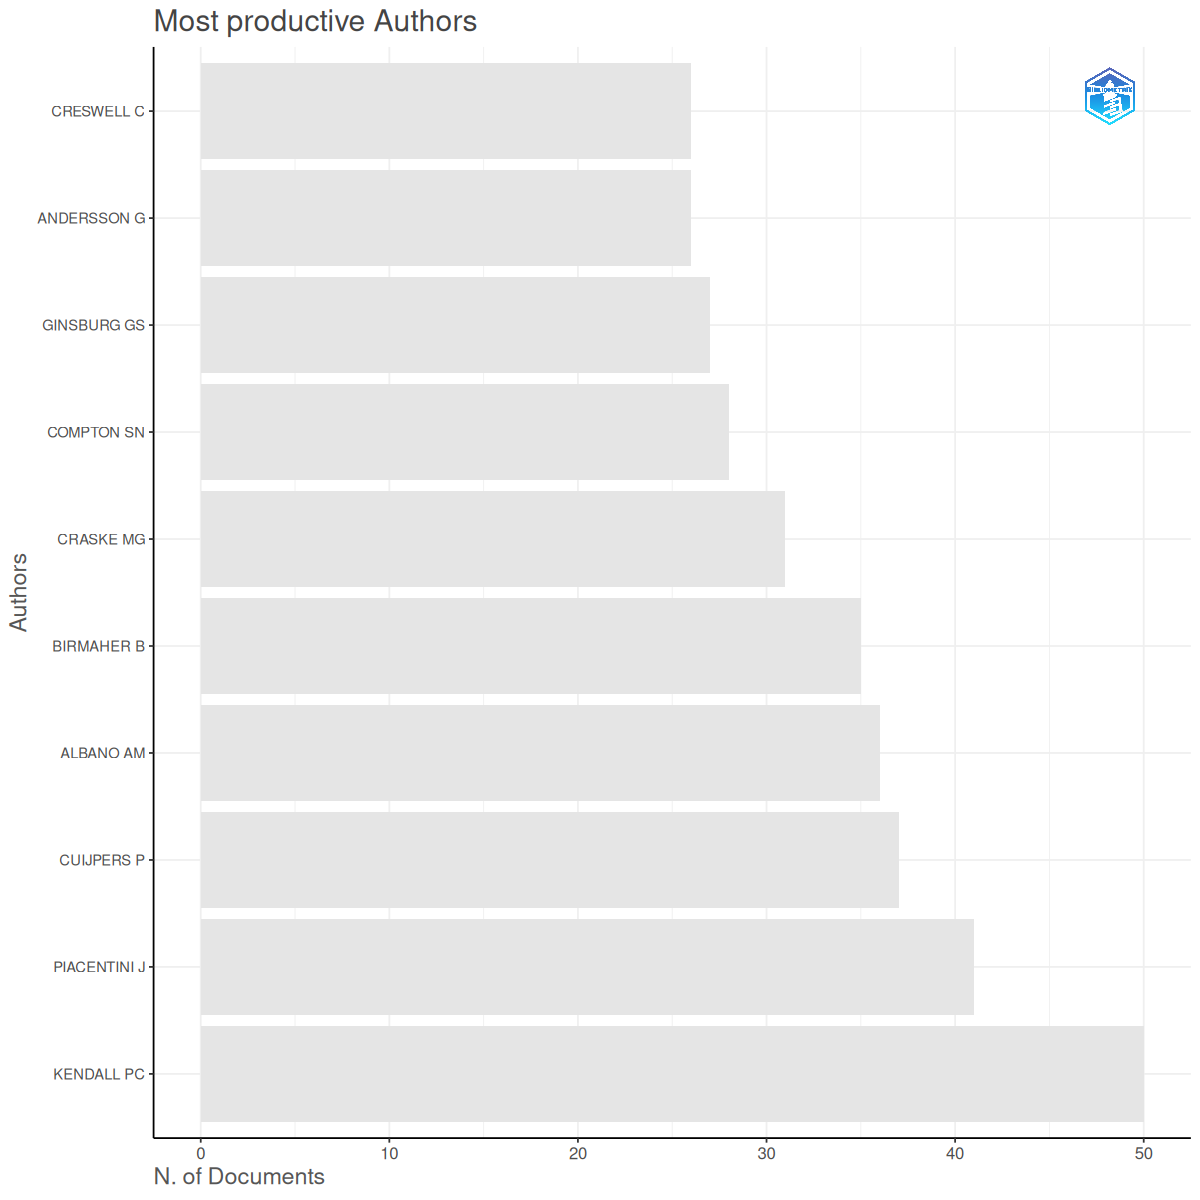

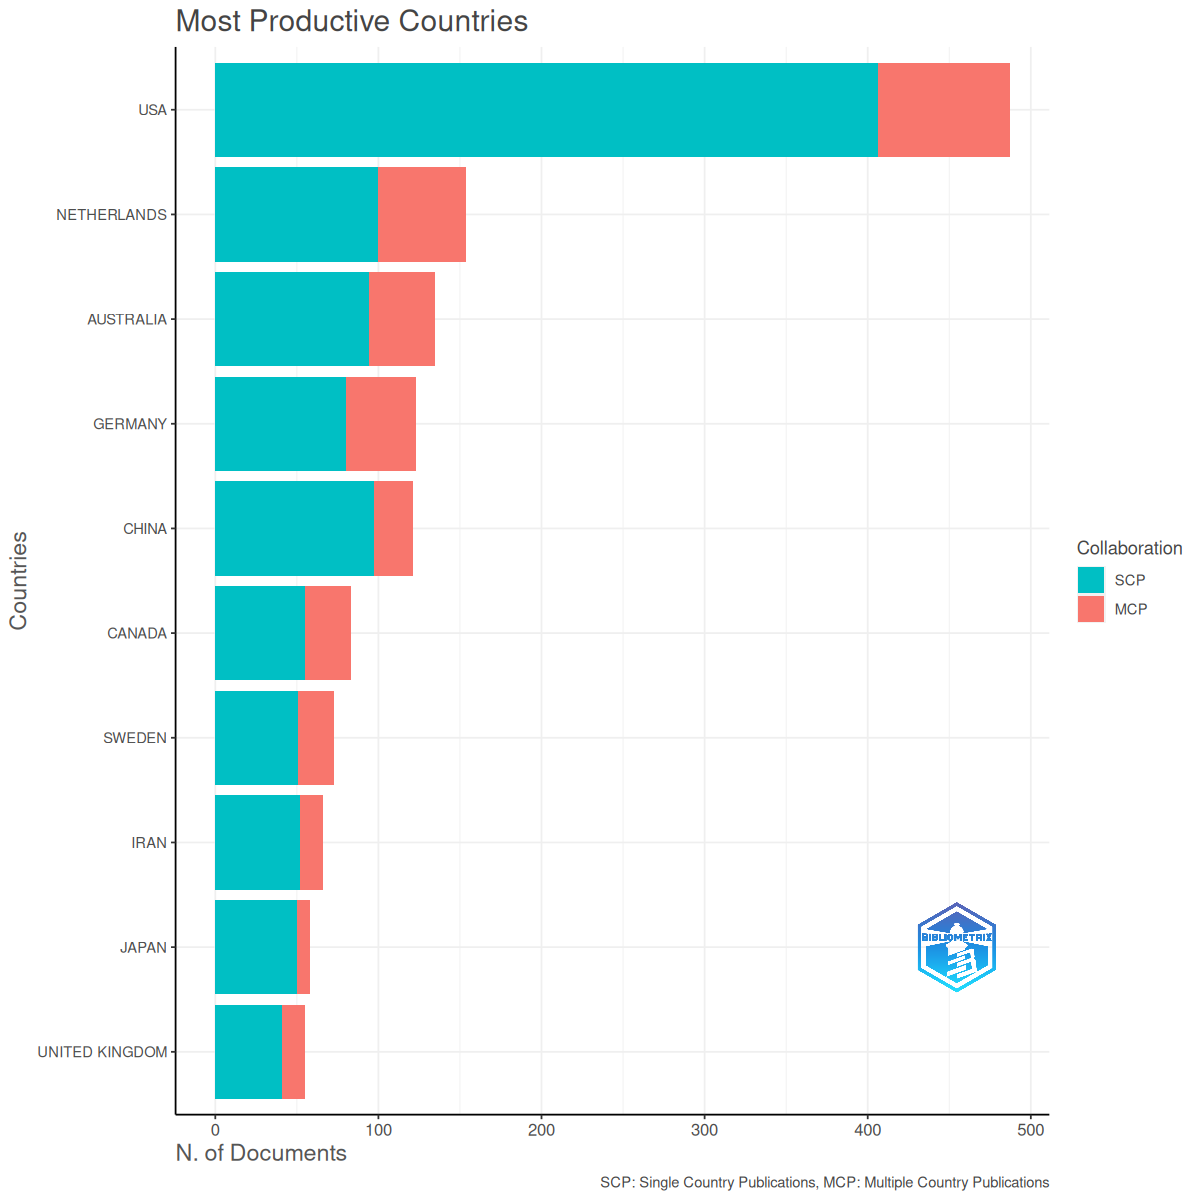

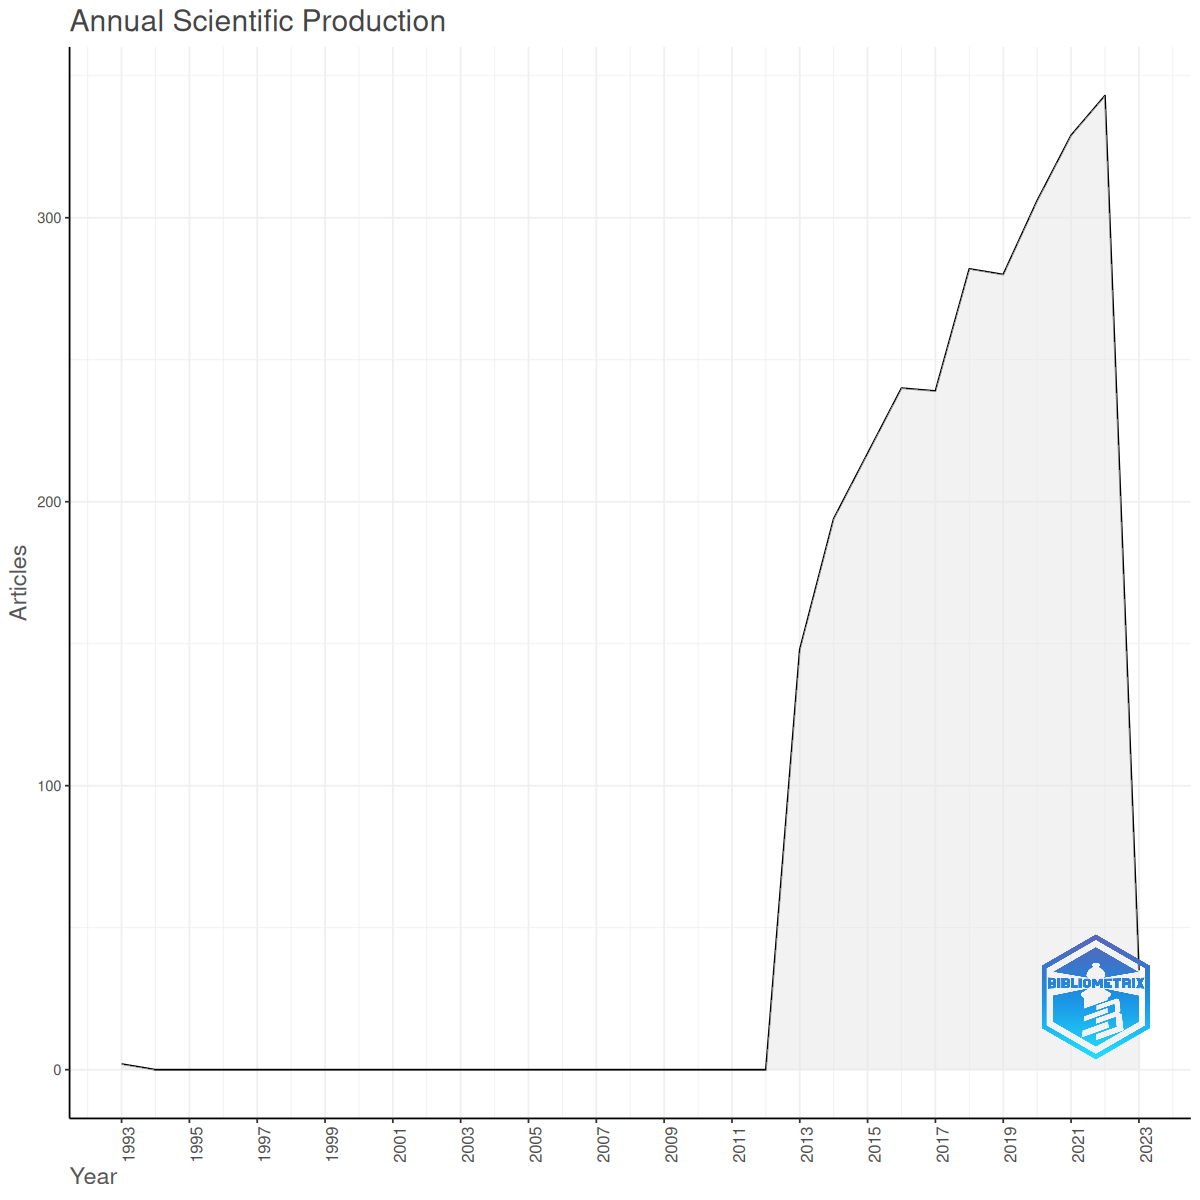

In [13]:
fig(10, 10)
plot(x = results, k = 10, pause = FALSE)

## Top-authors' productivity over the time

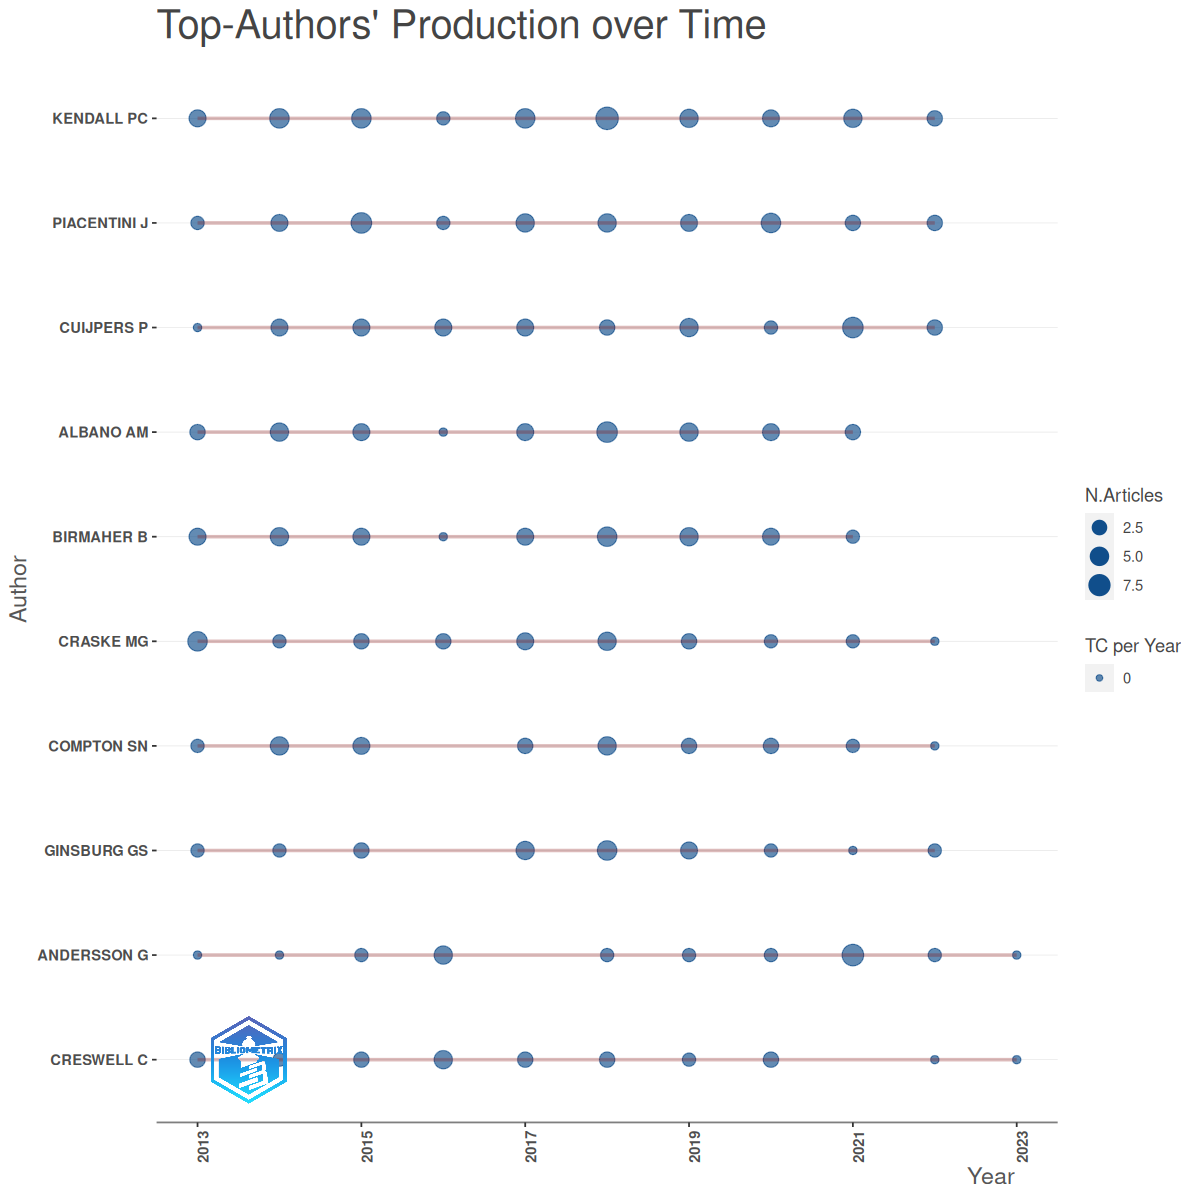

In [18]:
top_au <- authorProdOverTime(df_0, k = 10, graph = TRUE)

## Lotka's law

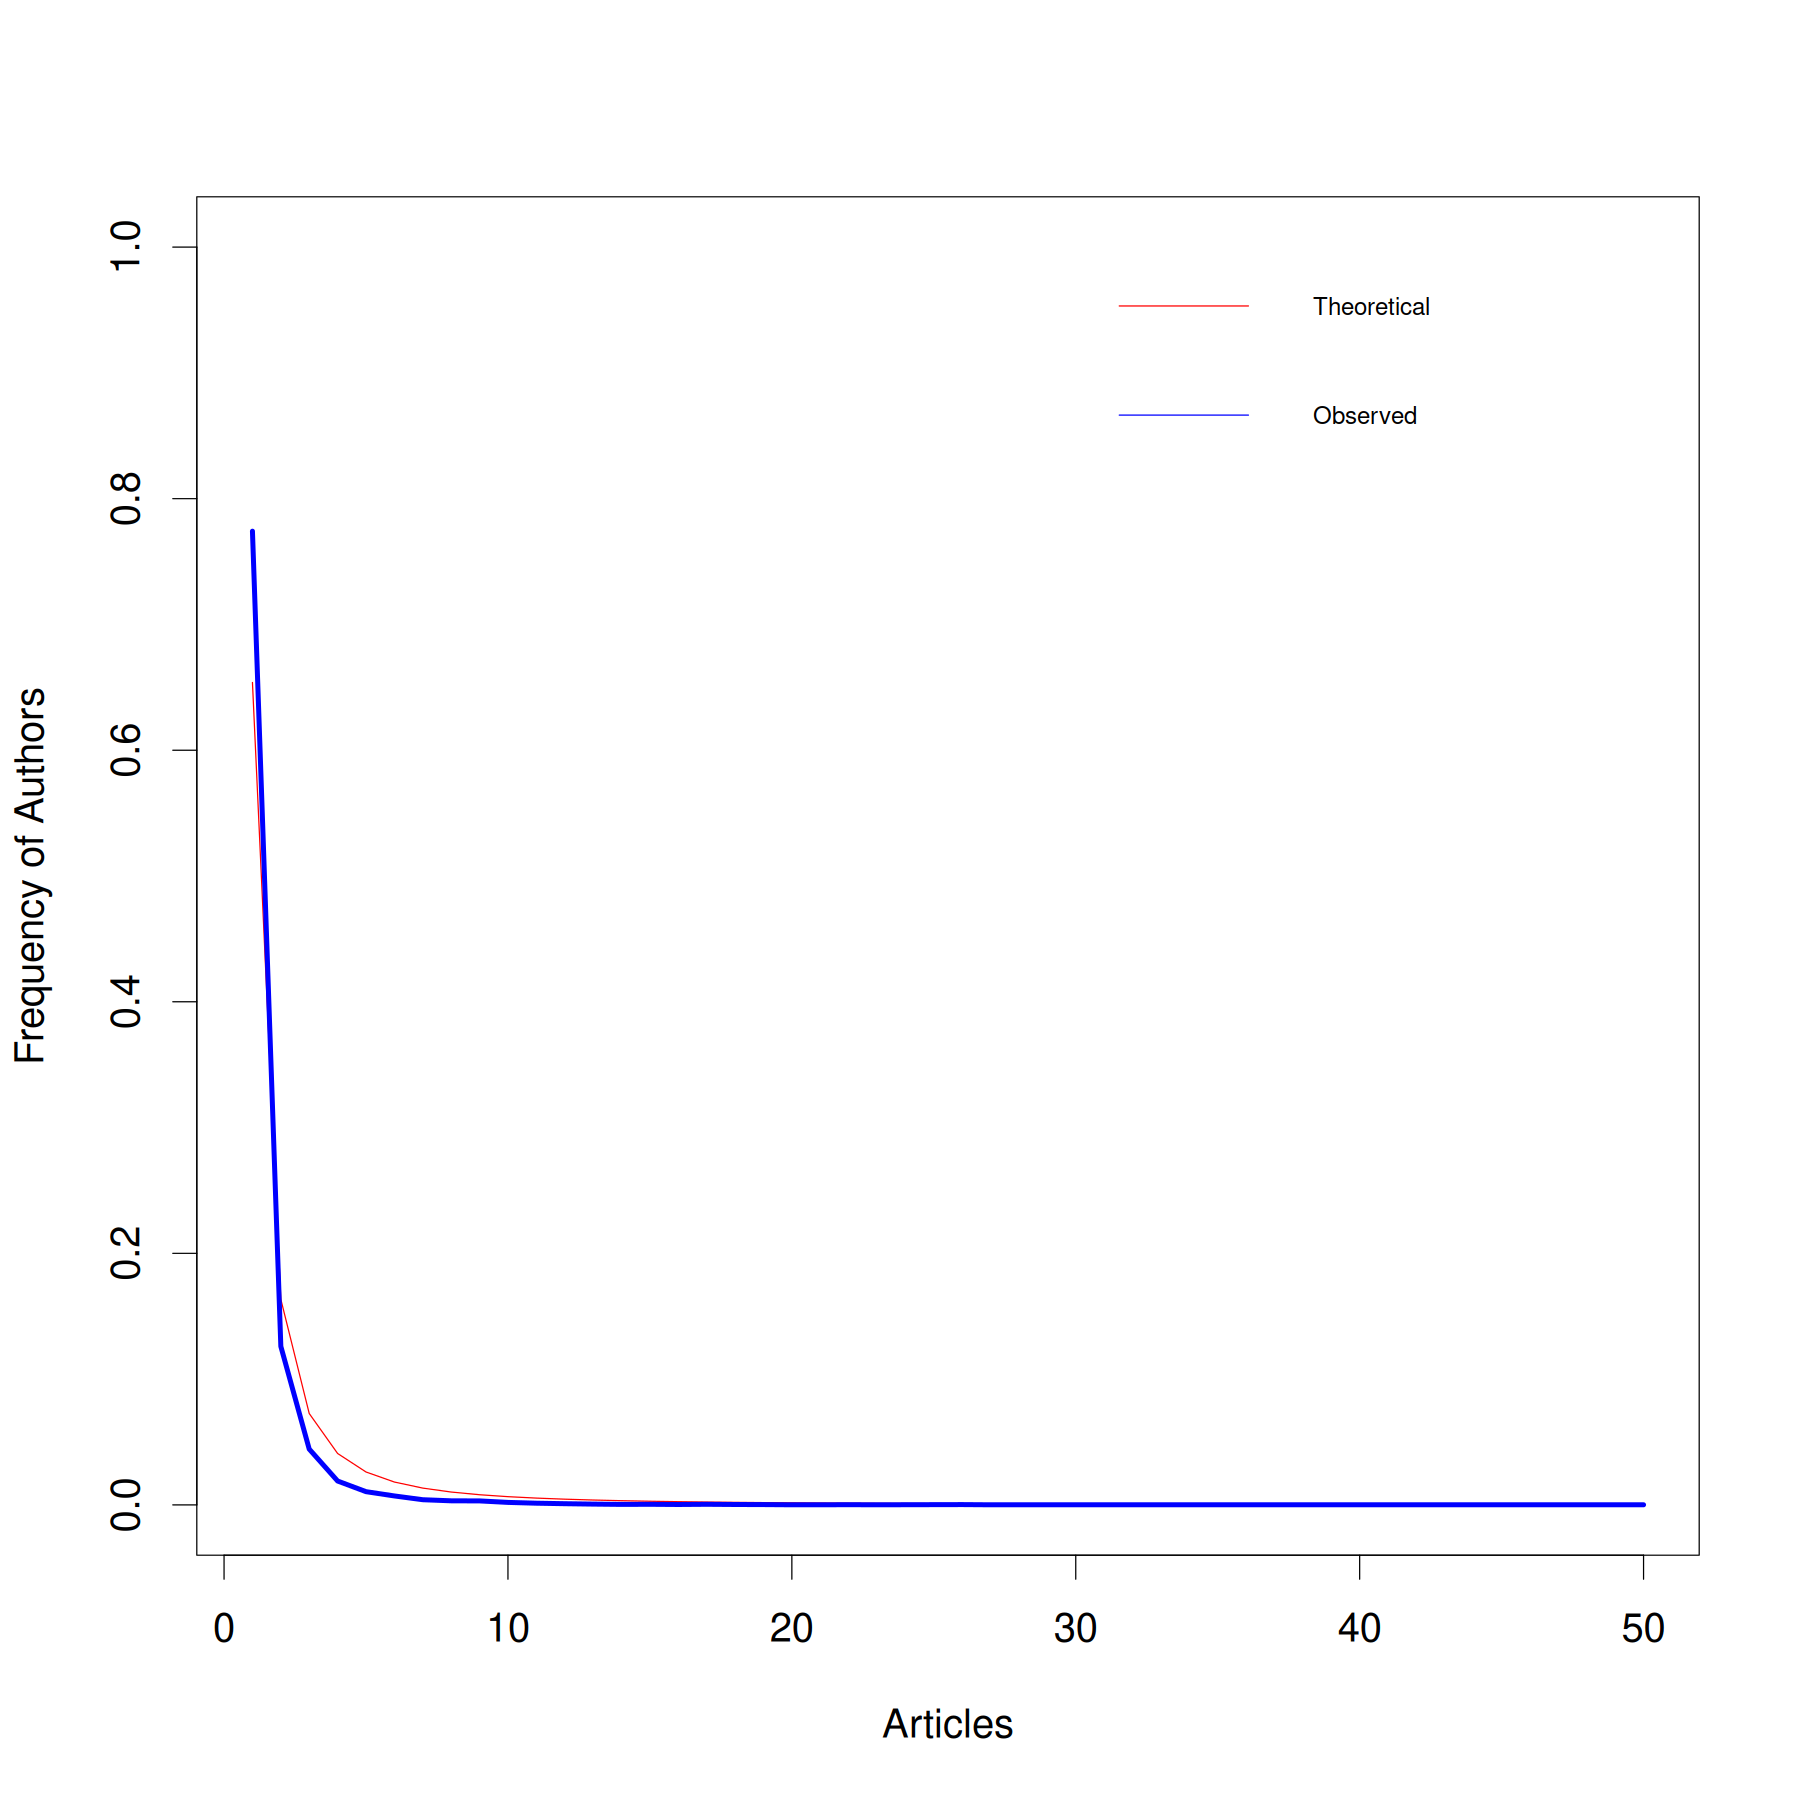

In [25]:
L <- lotka(results)

# Observed distribution
obs <- L$AuthorProd[, 3]

# Theoretical distribution with Beta = 2
emp <- 10^(log10(L$C) - 2 * log10(L$AuthorProd[, 1]))

fig(15, 15)
par(cex = 2)
plot(L$AuthorProd[,1], emp, type = "l", col = "red", ylim = c(0, 1), xlab = "Articles", ylab = "Frequency of Authors", main = NULL)
lines(L$AuthorProd[, 1], obs, col = "blue", lwd = 4)
legend(x = "topright", c("Theoretical", "Observed"), col = c("red", "blue"), lty = c(1, 1, 1), cex = 0.6, bty = "n")

## Bibliographic networks

In [26]:
# Collaboration network
net_mat <- biblioNetwork(df_0, analysis = "collaboration", network = "authors", sep = ";")

In [28]:
net_stat <- networkStat(net_mat)

In [30]:
summary(net_stat, k = 10)



Main statistics about the network

 Size                                  12649 
 Density                               0.002 
 Transitivity                          0.943 
 Diameter                              16 
 Degree Centralization                 0.027 
 Average path length                   5.14 
 





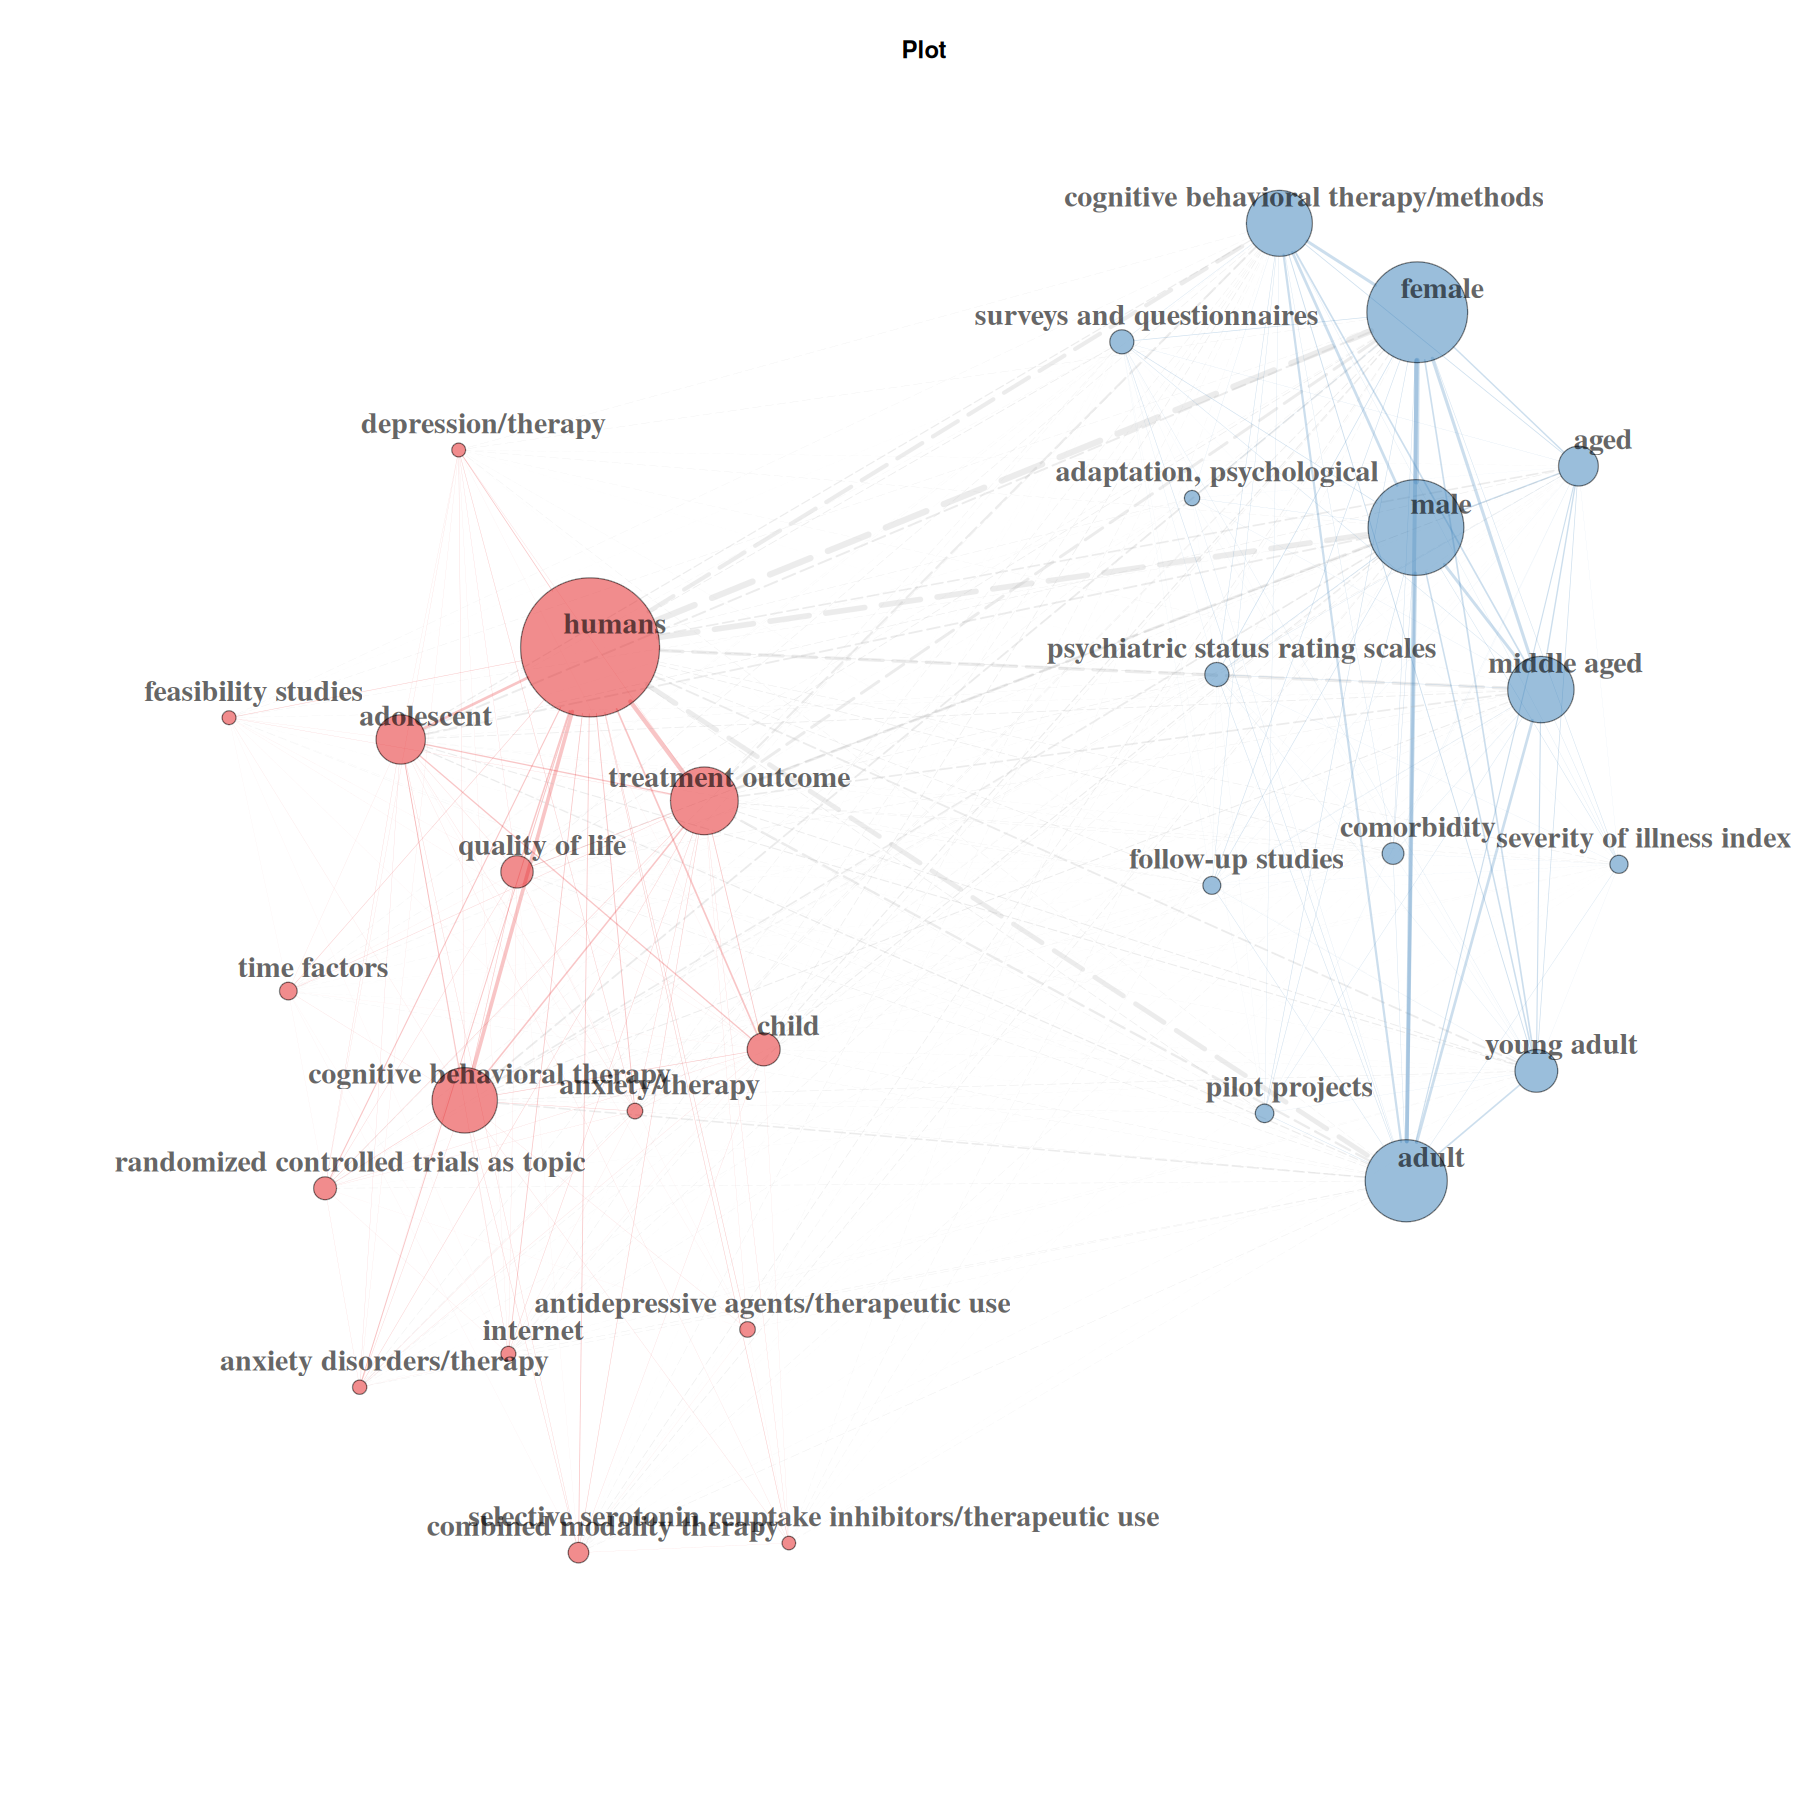

In [37]:
# Co-occurrence network
net_mat <- biblioNetwork(df_0, analysis = "co-occurrences", network = "keywords", sep = ";")

net <- networkPlot(net_mat, normalize="association", weighted = TRUE, n = 30, type = "fruchterman", size = TRUE, edgesize = 5, labelsize = 1.5)

## Co-word analysis

Warning message:
“ggrepel: 676 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 666 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


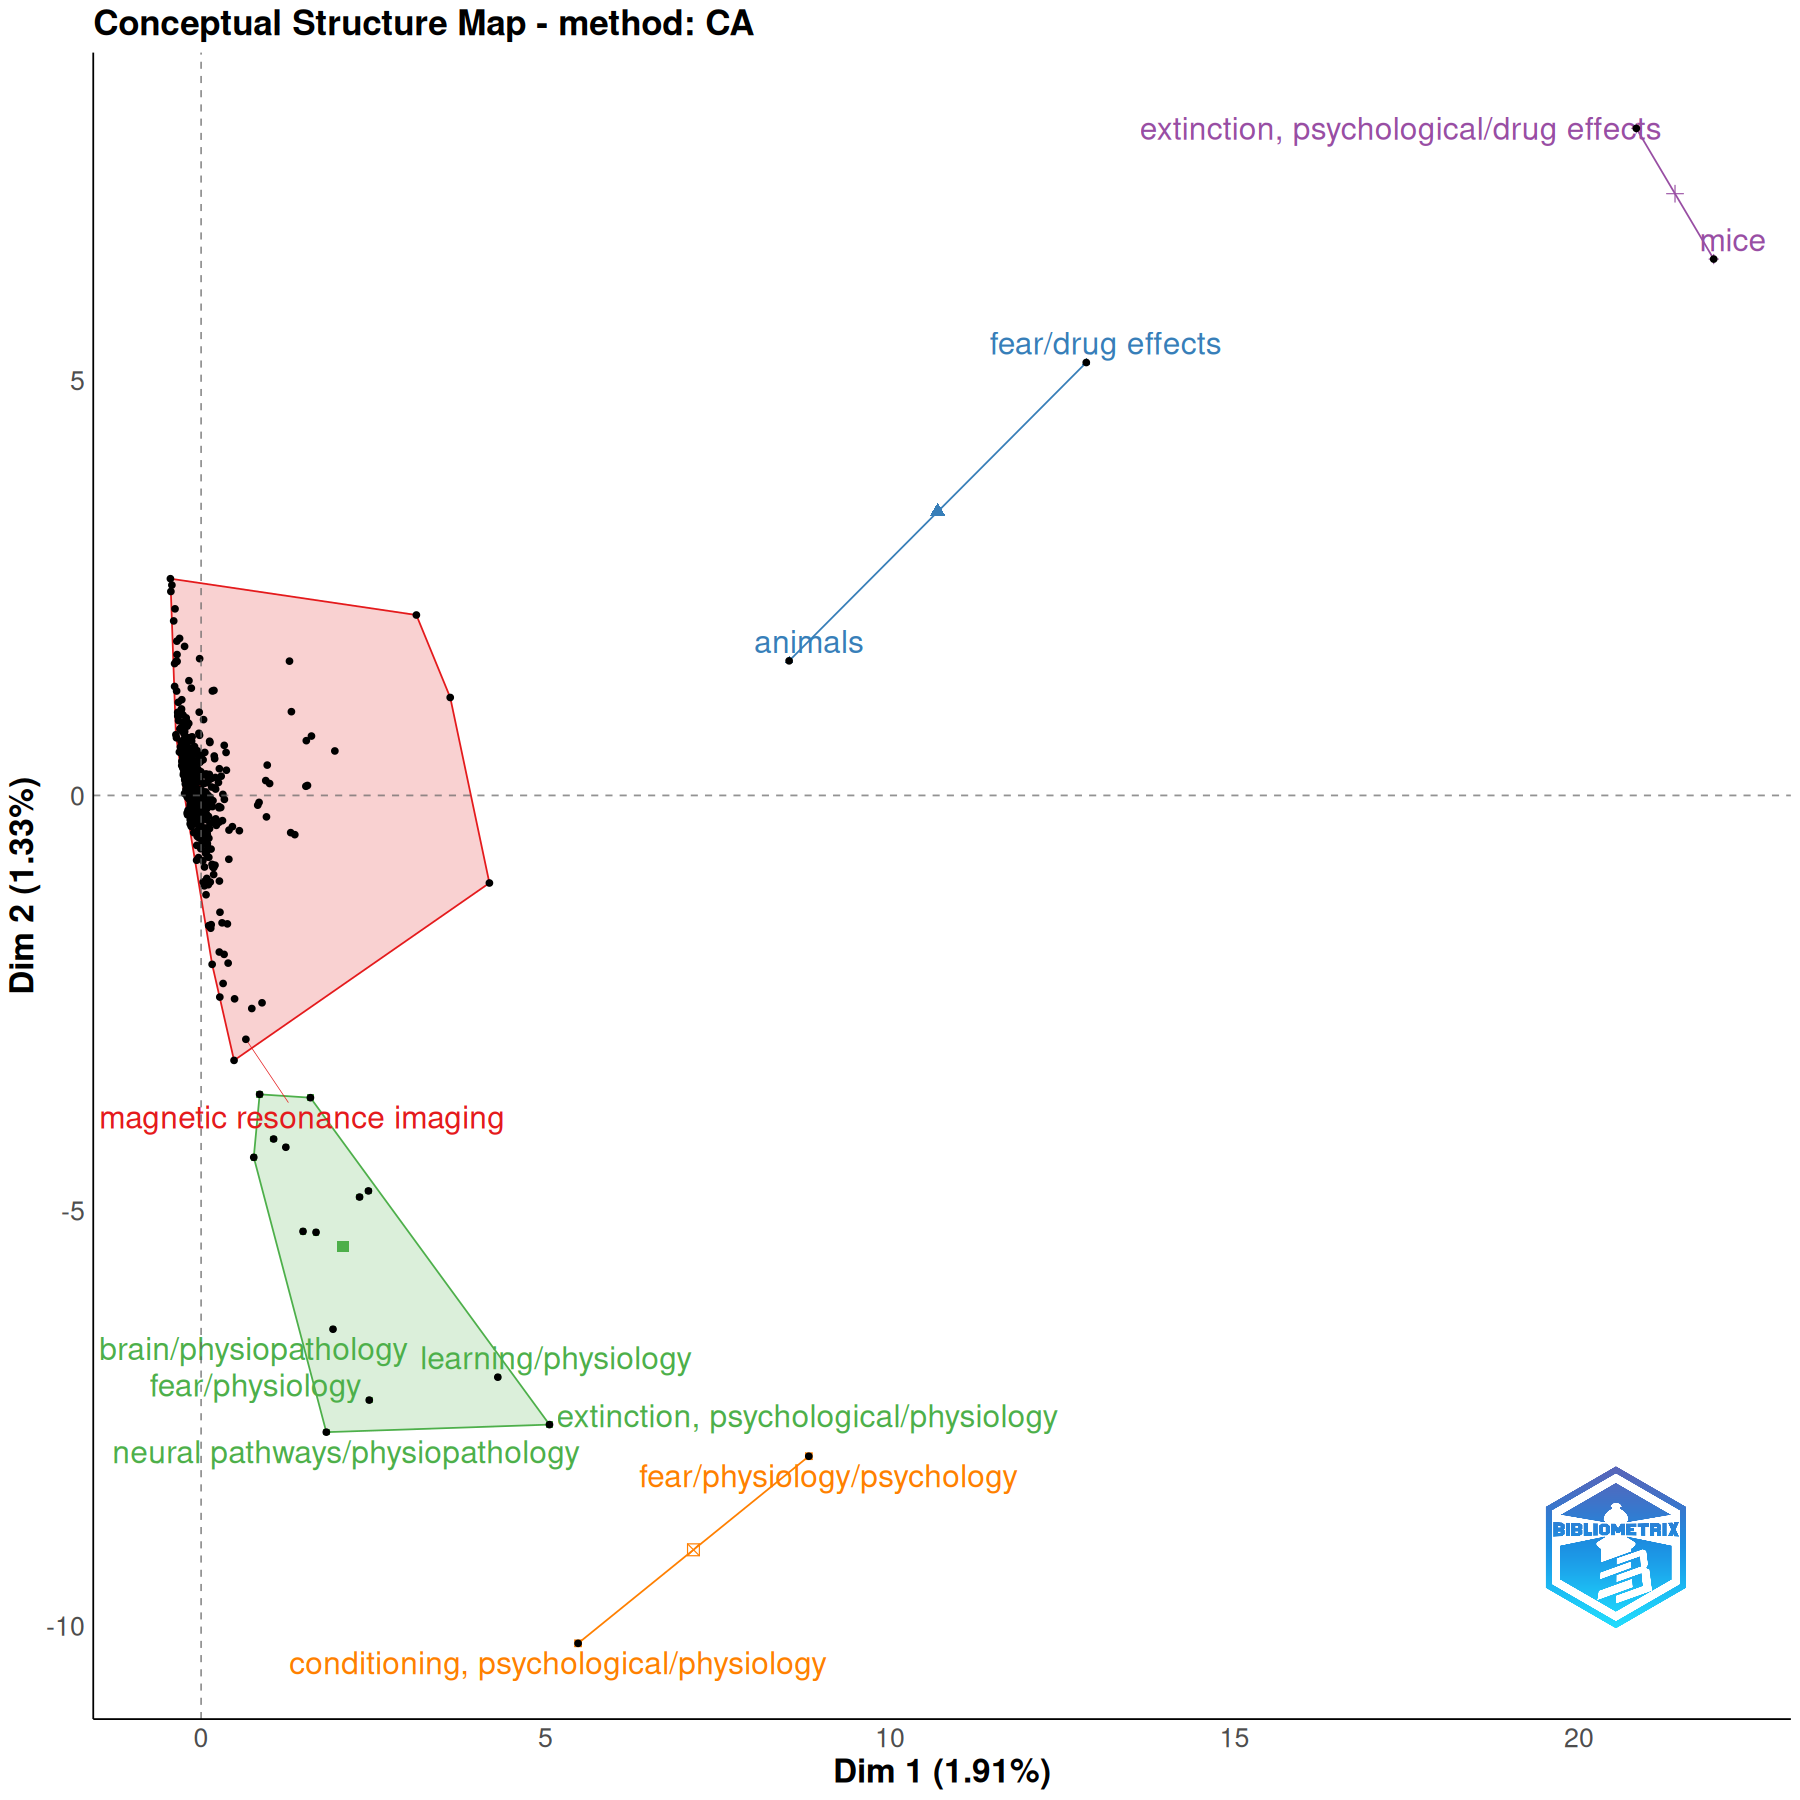

Warning message:
“ggrepel: 18 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


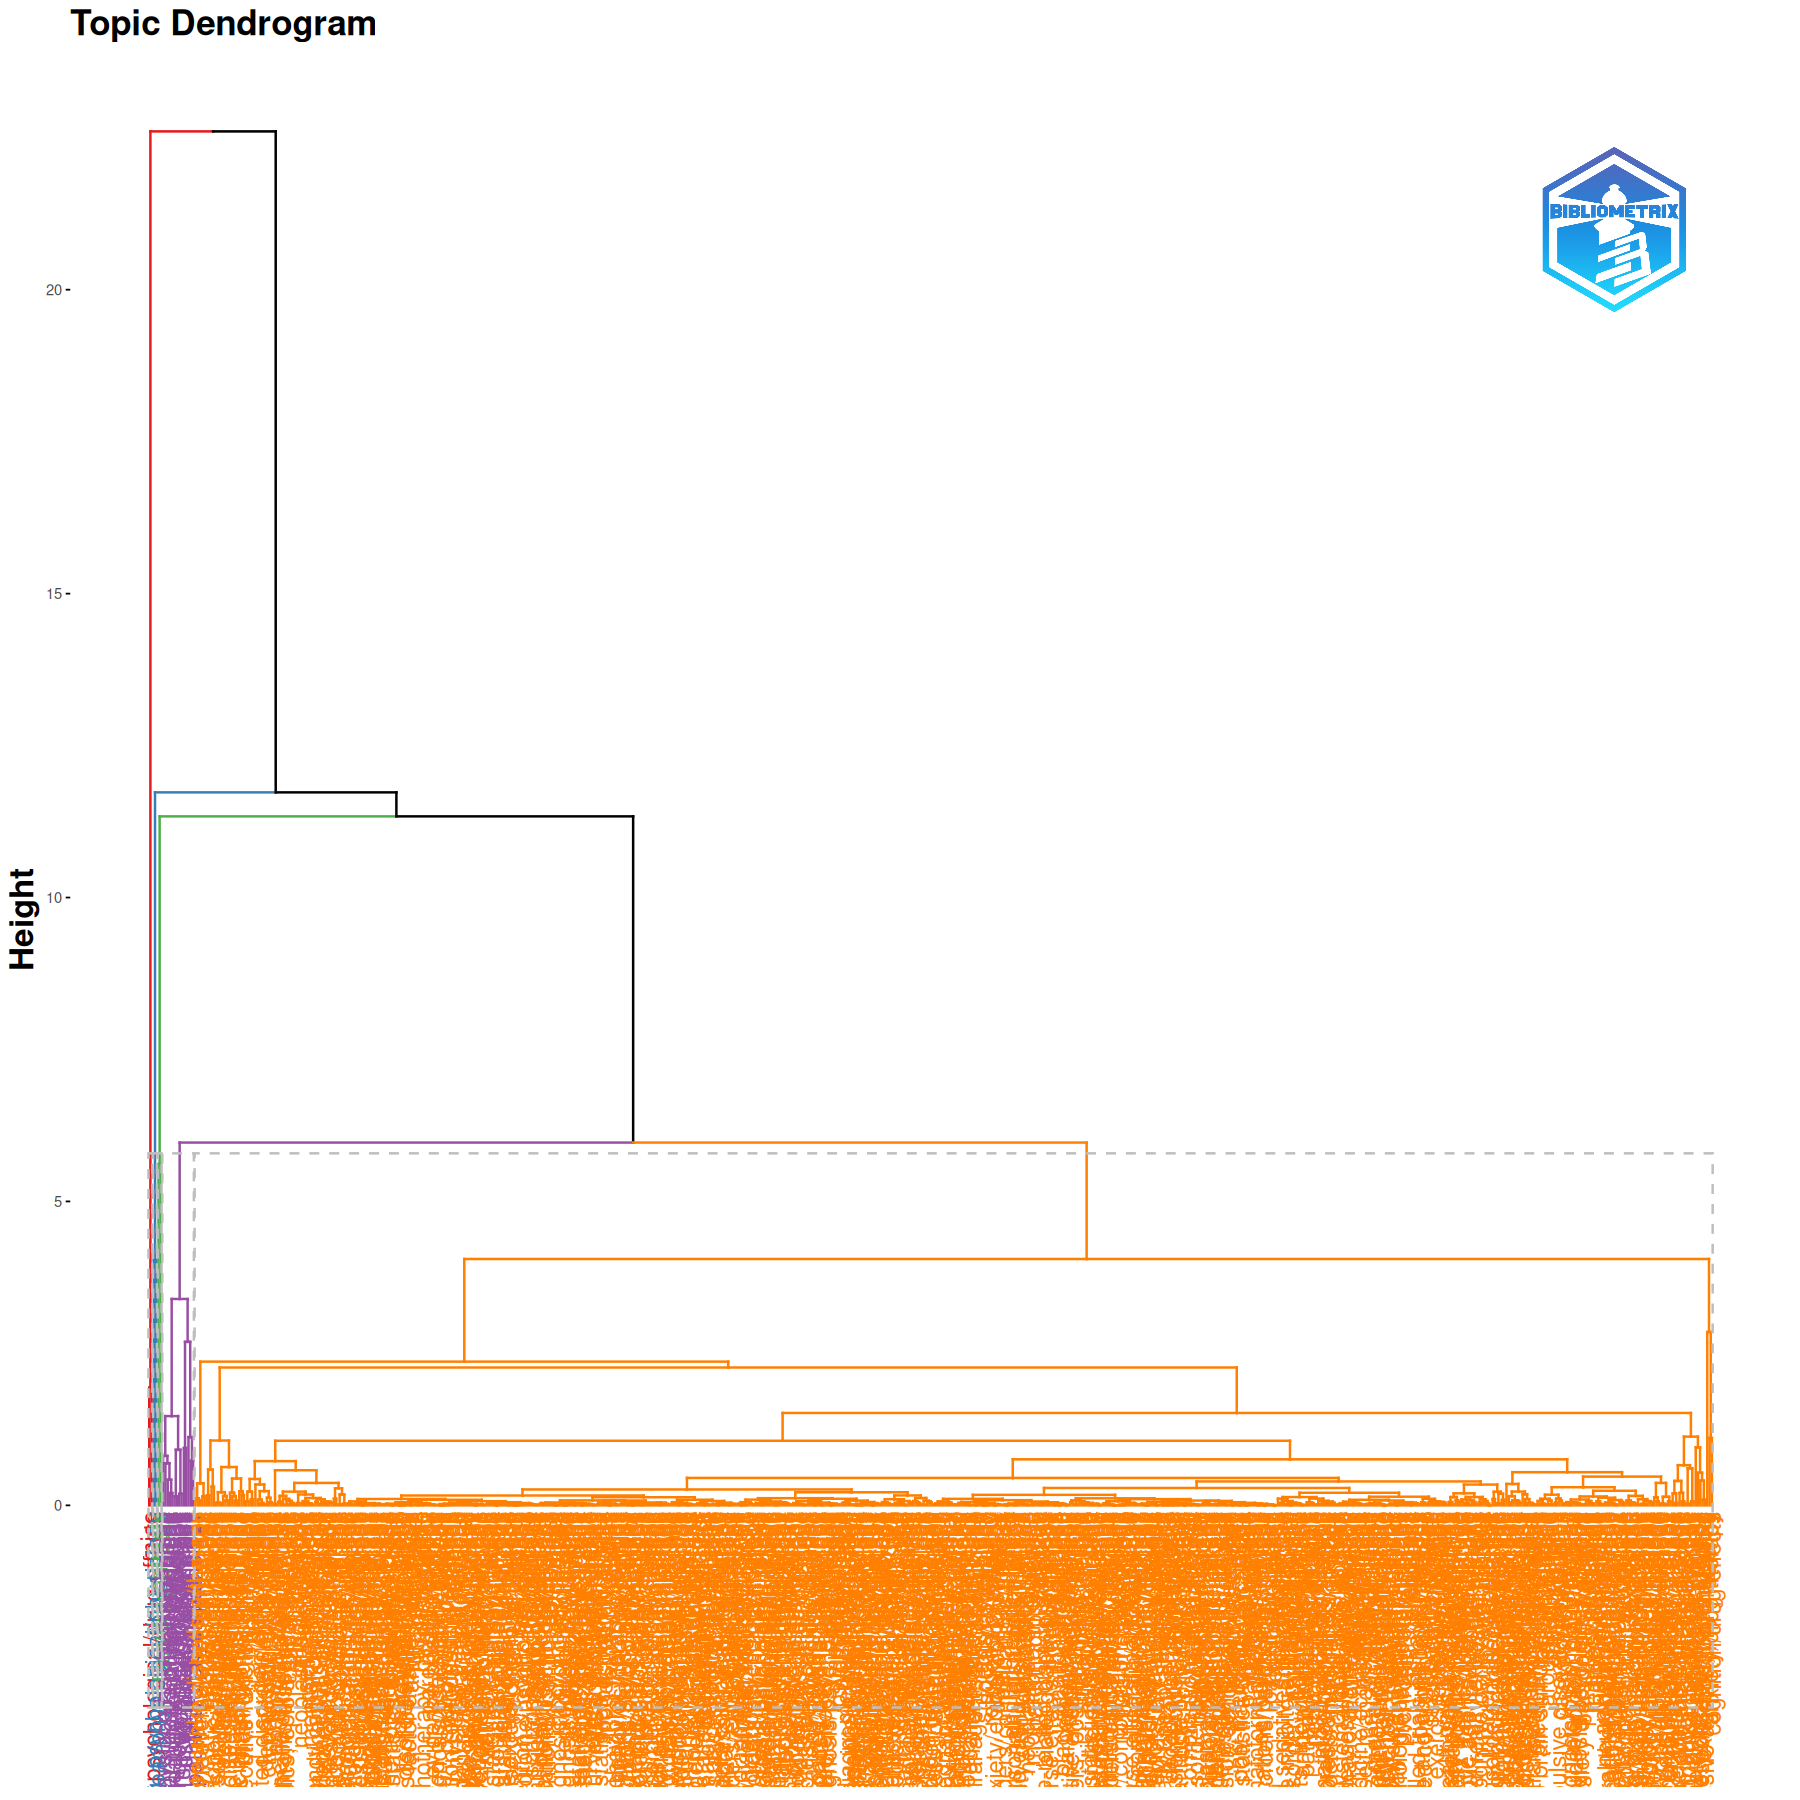

Warning message:
“ggrepel: 2148 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


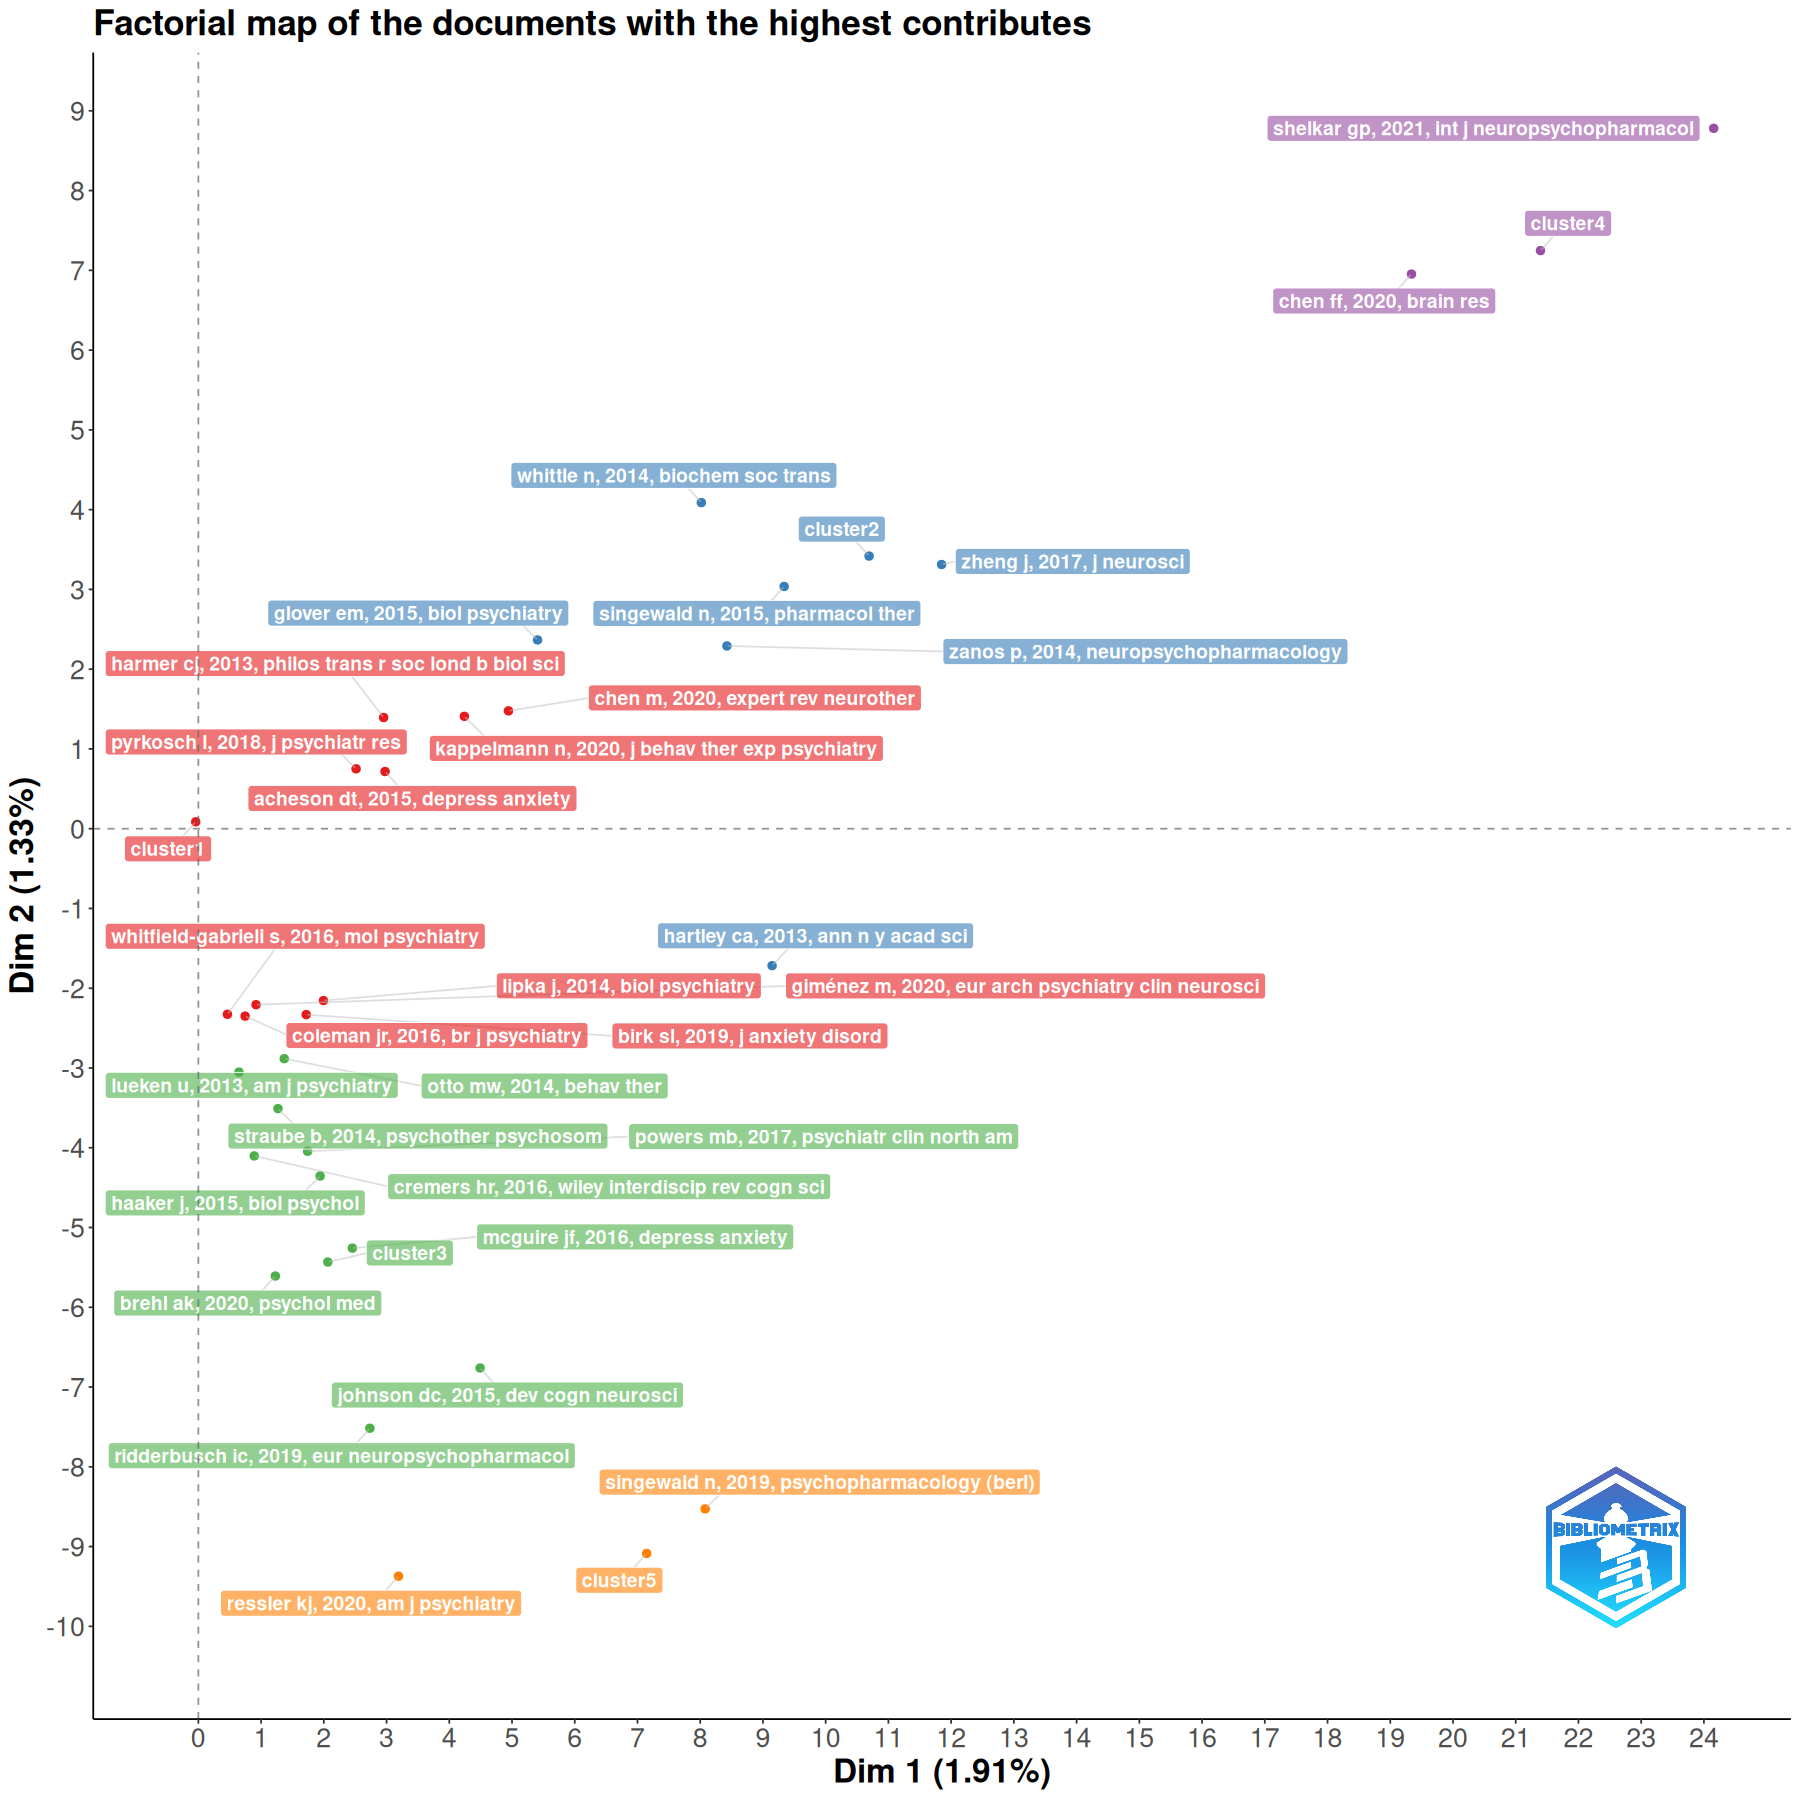

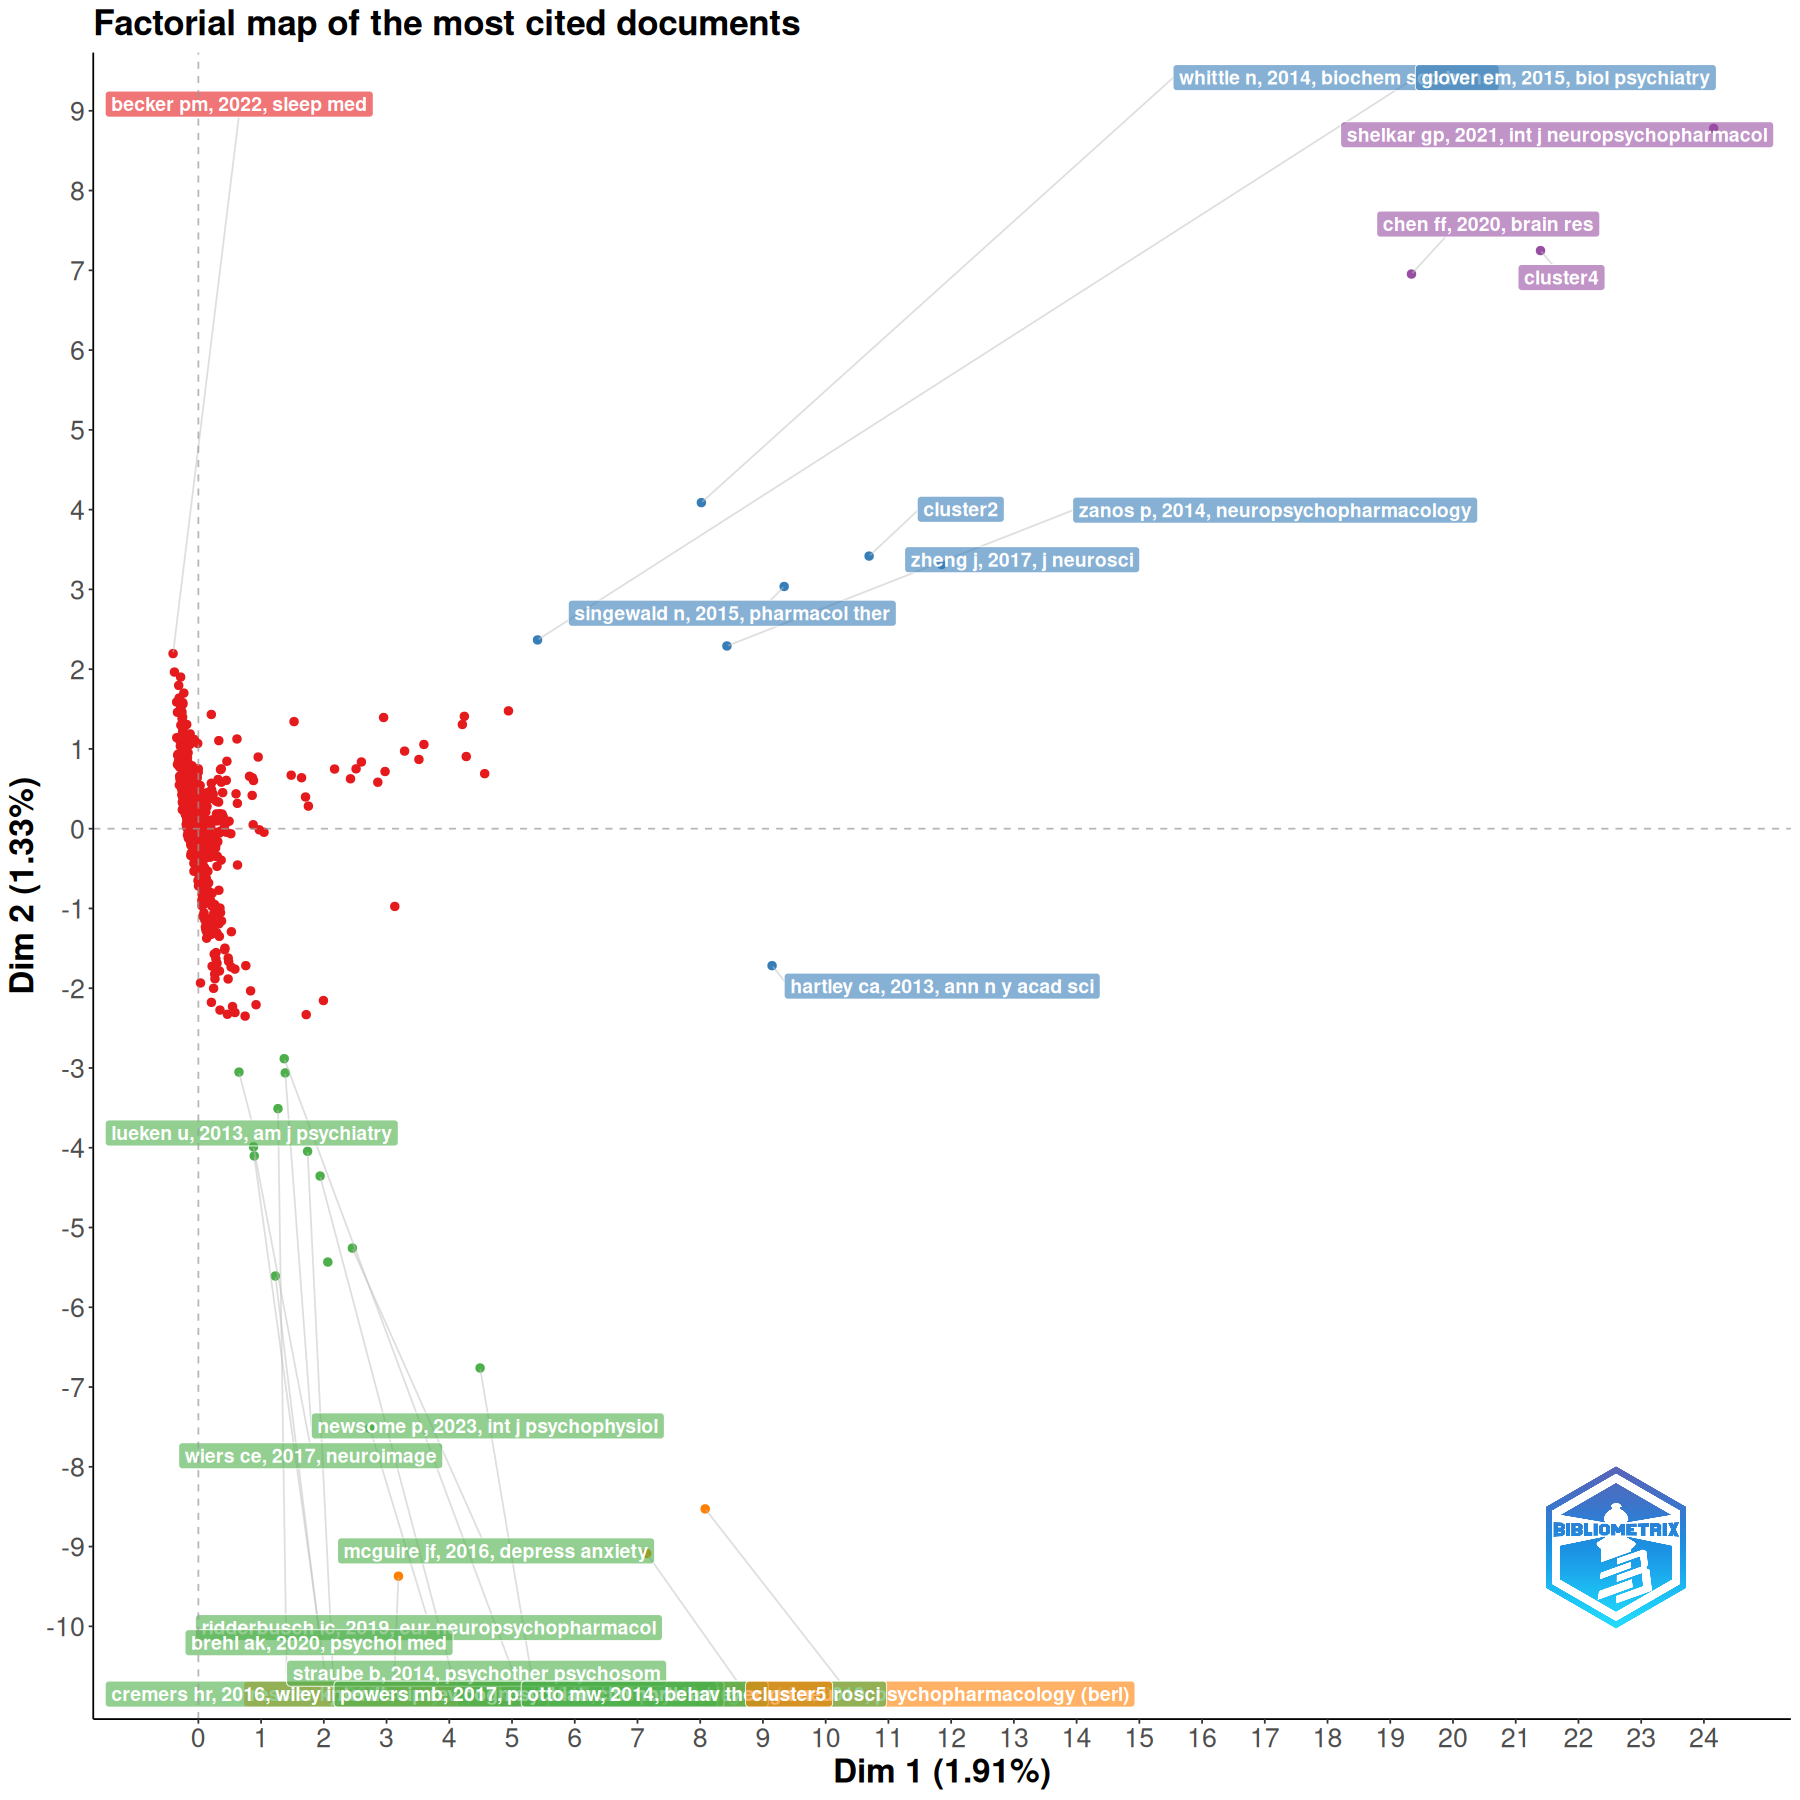

In [39]:
cw_ana <- conceptualStructure(df_0, field = "ID", method = "CA", minDegree = 4, clust = 5, stemming = FALSE, labelsize = 20, documents = 10)

## CiteSpace

<div style="text-align: center;"/>
<img src="images/EiKLwshXYAED61M.jpeg" width=1000 />
</div>

<div style="text-align: center;"/>
<img src="images/frma-05-595370-g001.jpg" width=800 />
</div>

<div style="text-align: center;"/>
<img src="images/copy-2020-DCA_v4773e17044.png" width=800 />
</div>